<a href="https://colab.research.google.com/github/DanielaEsperanza/AGENDA-AMIGOS/blob/master/Copia_de_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KARLA DANIELA TORRES ESPERANZA
#ALVARO ANTONIO RIVERA MORAN
#RIGOBERTO ALEXANDER MEJIA SORTO
#DIMAS ISRAEL MELARA ROSALES


In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


                                      

# VISUALIZAR LOS DATOS

In [2]:
# Cargar los datos de entrenamiento premezclados de fashion-mnist y los datos de prueba
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [3]:
# Imprimir la forma del conjunto de entrenamiento: tener  en cuenta que hay 60,000.00 datos de entrenamiento con un tamaño de imagen de 28x28
#60,000.00 etiquetas de entrenamiento
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Imprimir el número de conjuntos de datos de entrenamiento y prueba
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Definir las etiquetas de texto
fashion_mnist_labels = ["Camiseta/parte superior",      # index 0
                        "Pantalon",                     # index 1
                        "Sueter",                       # index 2 
                        "Vestido",                      # index 3 
                        "Saco",                         # index 4
                        "Sandalia",                     # index 5
                        "Camisa",                       # index 6 
                        "Tenis",                        # index 7 
                        "Bolsa",                      # index 8 
                        "Botin"]                      # index 9

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


y = 2 Sueter


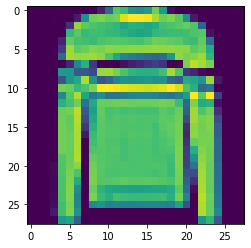

In [4]:
# índice de imágenes, puede elegir cualquier número entre 0 y 59,999
img_index = 5
# y_train contiene las etiquetas, que van de 0 a 9
# Imprime la etiqueta, por ejemplo 2 Sueter
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Muestra una de las imágenes del conjunto de datos de entrenamiento.
plt.imshow(x_train[img_index])

In [5]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

x_train.shape

(60000, 28, 28, 1)

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [7]:
BATCH_SIZE=1000
EPOCHS = 20

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
%time history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Epoch 1/20
48/48 [==============================] - 57s 1s/step - loss: 7.4959 - accuracy: 0.4434 - val_loss: 0.7881 - val_accuracy: 0.7275
Epoch 2/20
48/48 [==============================] - 51s 1s/step - loss: 1.0151 - accuracy: 0.6323 - val_loss: 0.6017 - val_accuracy: 0.7769
Epoch 3/20
48/48 [==============================] - 53s 1s/step - loss: 0.8320 - accuracy: 0.6912 - val_loss: 0.5441 - val_accuracy: 0.7944
Epoch 4/20
48/48 [==============================] - 51s 1s/step - loss: 0.7422 - accuracy: 0.7196 - val_loss: 0.5034 - val_accuracy: 0.8093
Epoch 5/20
48/48 [==============================] - 51s 1s/step - loss: 0.6869 - accuracy: 0.7433 - val_loss: 0.4749 - val_accuracy: 0.8162
Epoch 6/20
48/48 [==============================] - 51s 1s/step - loss: 0.6457 - accuracy: 0.7585 - val_loss: 0.4551 - val_accuracy: 0.8289
Epoch 7/20
48/48 [==============================] - 51s 1s/step - loss: 0.6056 - accuracy: 0.7717 - val_loss: 0.4353 - val_accuracy: 0.8358
Epoch 8/20
48/48 [==

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE)
train_accuracy

60/60 [==============================] - 10s 159ms/step - loss: 0.3243 - accuracy: 0.8793


0.8792833089828491

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

10/10 [==============================] - 4s 420ms/step - loss: 0.3530 - accuracy: 0.8666


0.866599977016449

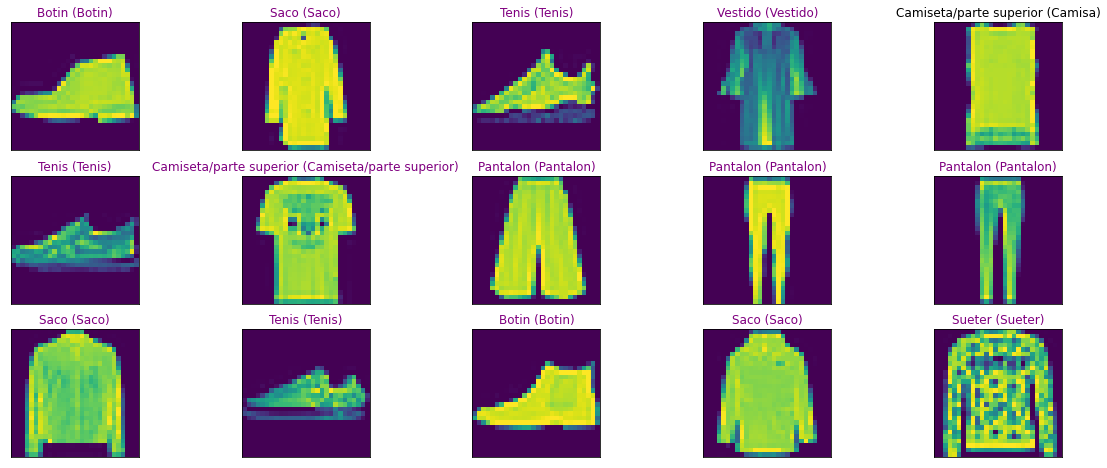

In [10]:
y_hat = model.predict(x_test)

# Trazar una muestra aleatoria de 10 imágenes de prueba, sus etiquetas predichas y la realidad del terreno
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Mostrar cada imagen
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Establecer el título para cada imagen.
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("purple" if predict_index == true_index else "black"))

In [11]:
import pandas as pd

def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']
    
    acc = history['acc']
    val_acc = history.history['val_acc']

    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(20,5))

    ax.plot(acc, 'bo', label='Training acc')
    ax.plot(val_acc, 'b', label='Validation acc')
    ax.set_title('Training and validation accuracy')
    ax.legend()

plot_history

<function __main__.plot_history(history, samples=10, init_phase_samples=None)>